## Transforming a (vanilla) linear classifier (Softmax) into a (vanilla) feedfoward neural network


---
---



## Imports and data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

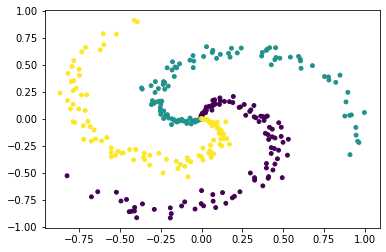

In [ ]:
# Generate nonlinear dataset
N = 100   # no of examples
D = 2   # data dimensionality
K = 3   # number of classes
X = np.zeros((N*K, D))  # data matrix (one row = one sample)
y = np.zeros(N*K, dtype='uint8')  # class labels
for j in range(K):
  ix = range(N*j, N*(j+1))
  r = np.linspace(0.0, 1, N)  # radius
  t = np.linspace(j*4, (j+1)*4, N) + np.random.randn(N) * 0.2   # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
plt.scatter(X[:, 0], X[:, 1], c=y, s=15)
plt.show()

## Softmax linear classifier

In [ ]:
# Initialize trainable parameters
W = 0.01 * np.random.randn(D,K)
b = np.zeros((1,K))

In [ ]:
# Set hyperparameters
reg = 1e-3
step_size = 1e-0
num_examples = X.shape[0]

In [ ]:
# Train the linear classifier
for i in range(200):
  # Evaluate class scores, [N x K]
  scores = np.dot(X,W) + b

  # Compute class probabilities
  exp_scores = np.exp(scores)
  probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)  # softmax function applied to input vector on a per row basis because each row is a vector containing scores of all classes for the ith example

  # Compute the loss: average cross-entropy loss and regularization
  correct_logprobs = -np.log(probs[range(num_examples), y])
  data_loss = np.sum(correct_logprobs) / num_examples   # cross-entropy data loss for all training examples
  reg_loss = 0.5 * reg * np.sum(W**2)
  loss = data_loss + reg_loss
  if i % 10 == 0:
    print(f'iteration {i}: loss = {loss}')

  # Compute the gradient of the loss function wrt the predicted scores which contain the trainable W and b parameters
  dscores = probs
  dscores[range(num_examples), y] -= 1
  dscores /= num_examples

  # Backpropagate the gradient to the parameters (W, b)
  dW = np.dot(X.T, dscores)
  dW += reg*W
  db = np.sum(dscores, axis=0, keepdims=True)

  # Perform parameter update
  W += -step_size *dW
  b += -step_size * db

print(f'Final loss = {loss}')

iteration 0: loss = 1.0973949768427615
iteration 10: loss = 0.9005916074171695
iteration 20: loss = 0.8274722001356491
iteration 30: loss = 0.794346791203374
iteration 40: loss = 0.7771545311440665
iteration 50: loss = 0.7673940190860282
iteration 60: loss = 0.7615001560367326
iteration 70: loss = 0.7577798249680155
iteration 80: loss = 0.7553524892700958
iteration 90: loss = 0.7537279854787368
iteration 100: loss = 0.7526188142228056
iteration 110: loss = 0.7518492660737526
iteration 120: loss = 0.7513083513165631
iteration 130: loss = 0.7509240506040368
iteration 140: loss = 0.7506485828686384
iteration 150: loss = 0.7504496556434351
iteration 160: loss = 0.7503051020682008
iteration 170: loss = 0.7501995042755899
iteration 180: loss = 0.7501220178529532
iteration 190: loss = 0.7500649419511988
Final loss = 0.7500264336684448


In [ ]:
# Evaluate training accuracy
scores = np.dot(X, W) + b
predicted_class = np.argmax(scores, axis=1)
print(f'Training accuracy of the Softmax classifier: {np.mean(predicted_class == y)}')

Training accuracy of the Softmax classifier: 0.5333333333333333


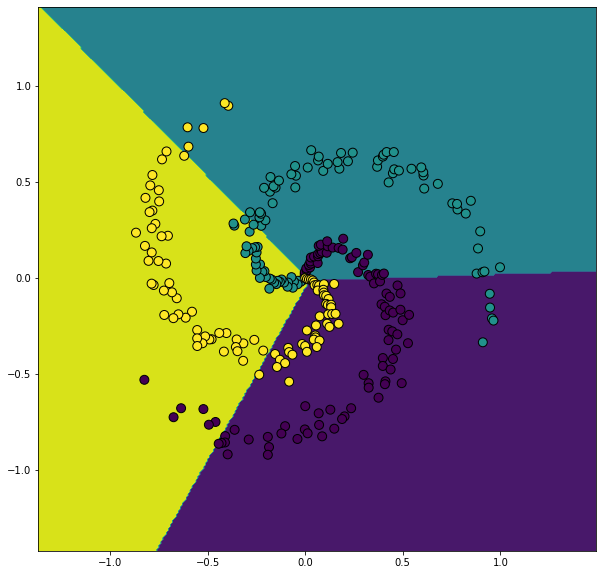

In [ ]:
# Plot classifier decision boundaries
x_min, x_max = X[:, 0].min()-0.5, X[:, 0].max()+0.5
y_min, y_max = X[:, 1].min()-0.5, X[:, 1].max()+0.5

x1grid = np.arange(x_min, x_max, 0.01)
x2grid = np.arange(y_min, y_max, 0.01)

xx, yy = np.meshgrid(x1grid, x2grid)

r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

grid = np.hstack((r1, r2))

scores = np.dot(grid, W) + b
yhat = np.argmax(scores, axis=1)

zz = yhat.reshape(xx.shape)

plt.rcParams["figure.figsize"] = (10,10)
plt.contourf(xx, yy, zz)
plt.scatter(X[:, 0], X[:, 1], c=y, s=80, edgecolor='black')
plt.show()

## 2 Layers Feedforward Neural Network

In [ ]:
# Initialize trainable/fixed parameters
h = 100   # size of hidden layer
step_size = 1e-0
reg = 1e-3
num_examples = X.shape[0]
W = 0.01 * np.random.randn(D,h)
b = np.zeros((1,h))
W2 = 0.01 * np.random.randn(h,K)
b2 = np.zeros((1,K))

In [ ]:
# Network training
for i in range(10000):
  # Evaluate class scores [N x K]
  hidden_layer = np.maximum(0, np.dot(X, W) + b)  # Hidden layer with ReLu activation
  scores = np.dot(hidden_layer, W2) + b2

  # Compute class probabilities
  exp_scores = np.exp(scores)
  probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)  # softmax function applied to input vector on a per row basis because each row is a vector containing scores of all classes for the ith example

  # Compute the loss: average cross-entropy loss and regularization
  correct_logprobs = -np.log(probs[range(num_examples), y])
  data_loss = np.sum(correct_logprobs) / num_examples   # cross-entropy data loss for all training examples
  reg_loss = 0.5 * reg * np.sum(W**2)
  loss = data_loss + reg_loss
  if i % 10 == 0:
    print(f'iteration {i}: loss = {loss}')

  # Compute the gradient of the loss function on scores
  dscores = probs
  dscores[range(num_examples), y] -= 1
  dscores /= num_examples

  # Backpropagate the gradient to the parameters. First backprop into parameters W2 and b2
  dW2 = np.dot(hidden_layer.T, dscores)
  db2 = np.sum(dscores, axis=0, keepdims=True)

  dhidden = np.dot(dscores, W2.T)
  dhidden[hidden_layer <= 0] = 0

  dW = np.dot(X.T, dhidden)
  db = np.sum(dhidden, axis=0, keepdims=True)

  # Add regularization gradient contribution
  dW2 += reg * W2
  dW += reg * W

  # Perform parameter update
  W2 += -step_size * dW2
  b2 += -step_size * db2
  W += -step_size * dW
  b += -step_size * db

iteration 0: loss = 1.0987081525206965
iteration 10: loss = 1.094628071745536
iteration 20: loss = 1.0694418004143373
iteration 30: loss = 0.948171260875342
iteration 40: loss = 0.7790601236535846
iteration 50: loss = 0.7216983107508698
iteration 60: loss = 0.7056057431320943
iteration 70: loss = 0.6978583085691081
iteration 80: loss = 0.6923641862752486
iteration 90: loss = 0.6874906063924066
iteration 100: loss = 0.682867031345092
iteration 110: loss = 0.6784177248533182
iteration 120: loss = 0.674027012671963
iteration 130: loss = 0.6695675976662488
iteration 140: loss = 0.6648979179580682
iteration 150: loss = 0.6599513568627292
iteration 160: loss = 0.663947663482035
iteration 170: loss = 0.736183805181188
iteration 180: loss = 0.6775084681124989
iteration 190: loss = 0.6919568591633629
iteration 200: loss = 0.6878573764130563
iteration 210: loss = 0.6874278812764888
iteration 220: loss = 0.7295758420939925
iteration 230: loss = 0.7292597018615159
iteration 240: loss = 0.697049798

In [ ]:
# Evaluate training accuracy
hidden_layer = np.maximum(0, np.dot(X, W)+ b)
scores = np.dot(hidden_layer, W2) + b2
predicted_class = np.argmax(scores, axis=1)
print(f'Training accuracy: {np.mean(predicted_class == y)}')

Training accuracy: 0.9766666666666667


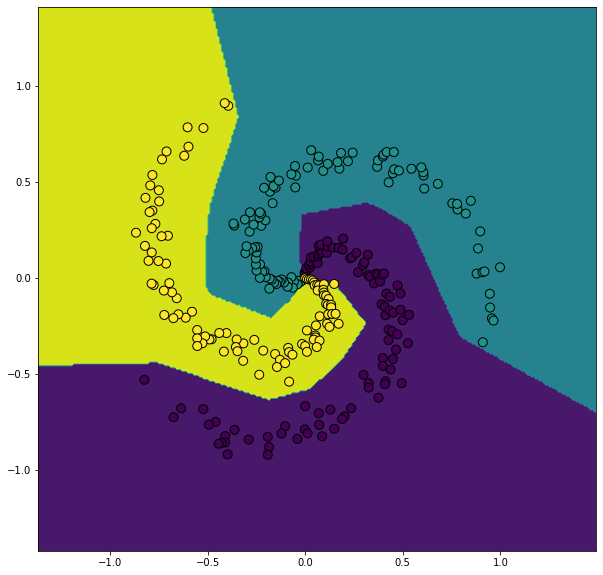

In [ ]:
# Plot classifier decision boundaries
x_min, x_max = X[:, 0].min()-0.5, X[:, 0].max()+0.5
y_min, y_max = X[:, 1].min()-0.5, X[:, 1].max()+0.5

x1grid = np.arange(x_min, x_max, 0.01)
x2grid = np.arange(y_min, y_max, 0.01)

xx, yy = np.meshgrid(x1grid, x2grid)

r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

grid = np.hstack((r1, r2))

hidden_layer = np.maximum(0, np.dot(grid, W)+ b)
scores = np.dot(hidden_layer, W2) + b2
yhat = np.argmax(scores, axis=1)

zz = yhat.reshape(xx.shape)

plt.rcParams["figure.figsize"] = (10,10)
plt.contourf(xx, yy, zz)
plt.scatter(X[:, 0], X[:, 1], c=y, s=80, edgecolor='black')
plt.show()